In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import gudhi
import numpy as np

In [6]:
def create_s_w_network(n,k,p):
    
    return nx.watts_strogatz_graph(n, k, p, seed=None)

def get_access_times_for_node(G,start_node,T):
    #G: network
    #T: number of iterations
    #start_node: node in which cascade starts
    
    x0 = np.zeros(G.size())
    x0[start_node] = 1;
    A = nx.adjacency_matrix(G).todense()


    # run dynamics
    x = np.zeros((T,G.size()))
    x[0] = x0
    for t in range(T-1):
        x[t+1] = np.dot(A,x[t].T)


    access_times_for_cascade = np.array([np.where(x.T[i])[0][0]for i in range(G.size())])


    return access_times_for_cascade

In [7]:
cmap = 'jet'
start_node = 25
time = 100
n = 100
k = 2
probs = [0,0.01,0.02,0.03,0.04,0.05] 

### Access times for 6 watts-strogatz networks with varying p=[0,0.1,0.2,0.3,0.4,0.5]. Access_times is sometimes, somehow, empty array for bigger values of p so, error occurs, idk why.

IndexError: index 0 is out of bounds for axis 0 with size 0

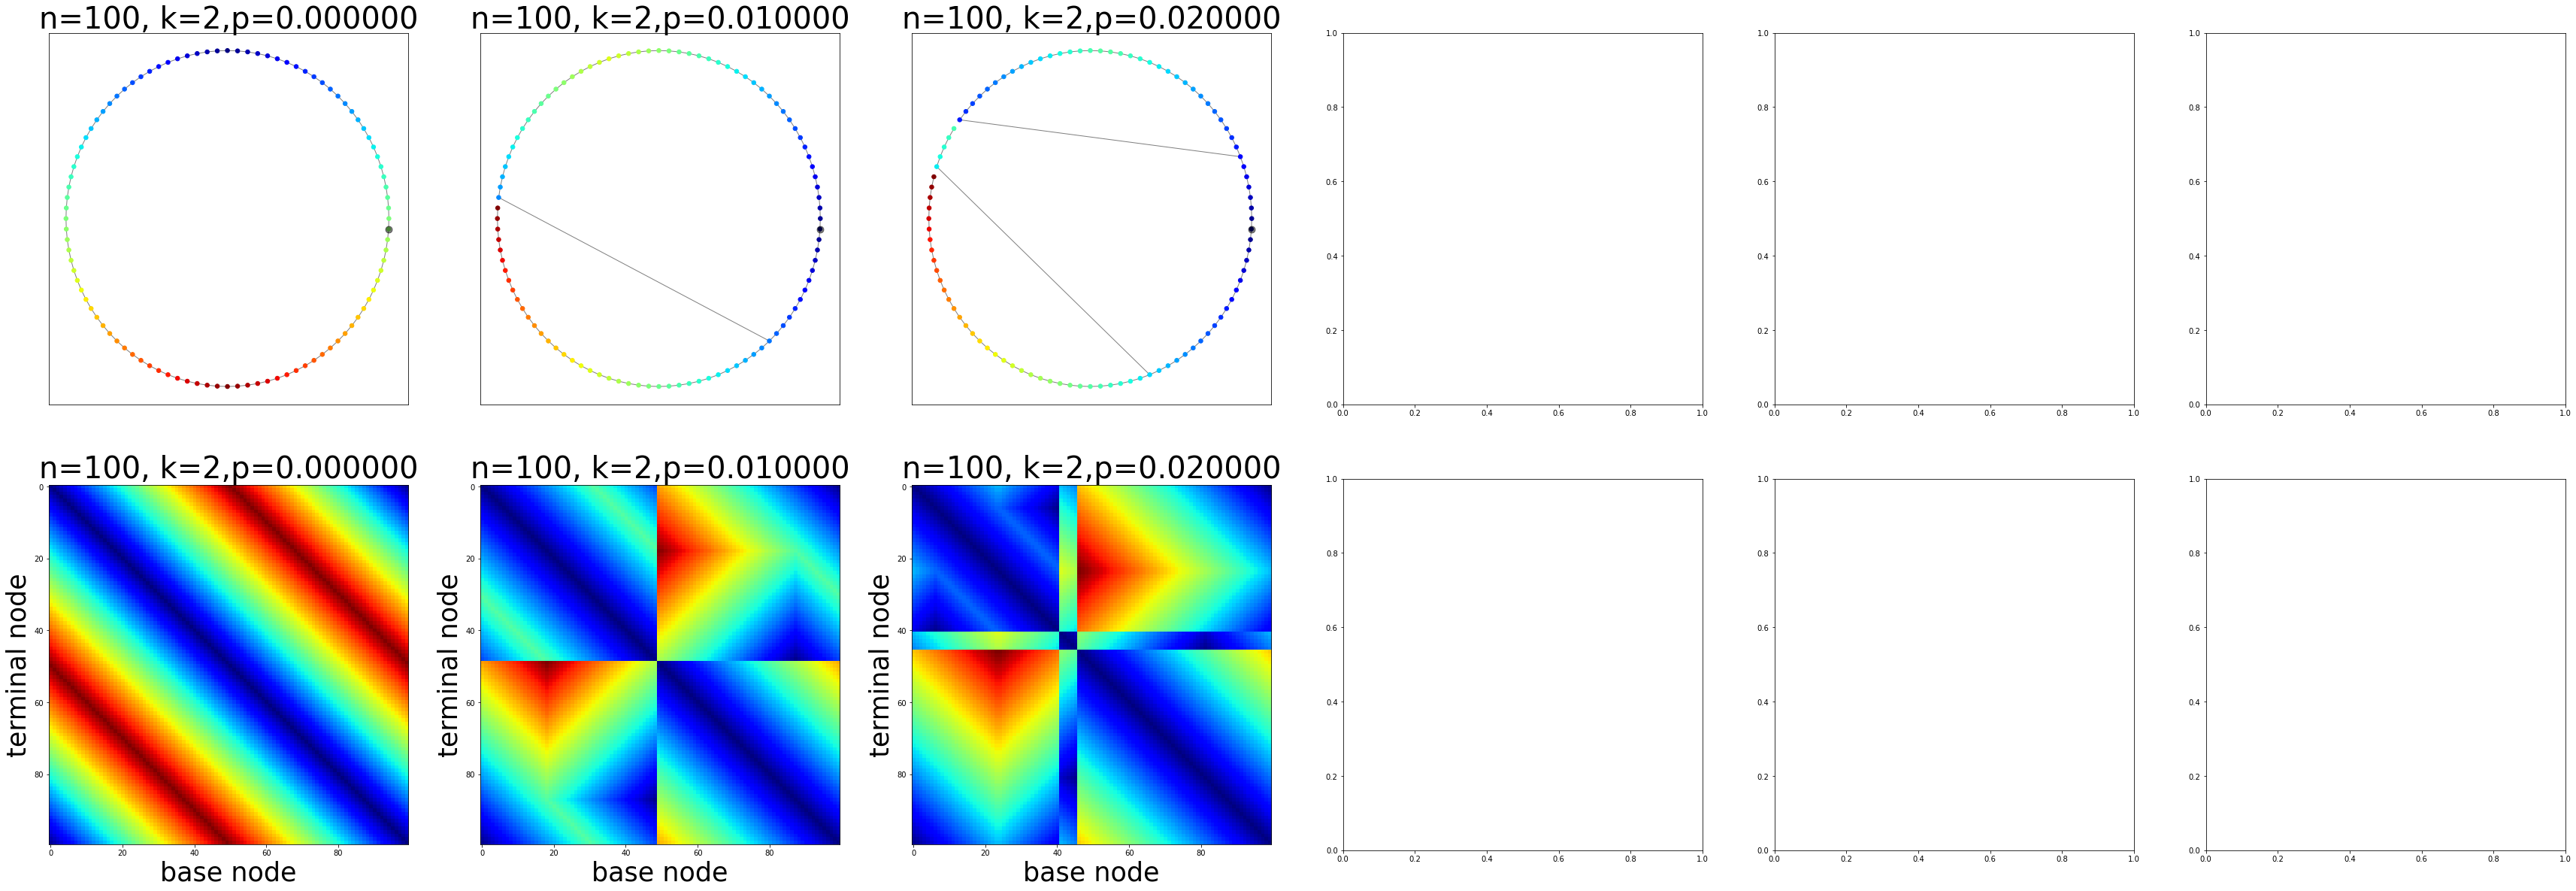

In [8]:
fig,ax = plt.subplots(2,6,figsize=(60,20))
networks=[]
access_times=[]
all_access_times_nodes=[]
simplex_trees=[]
diags=[]


for i,p in enumerate(probs):
    
    #create networks of different p
    networks.append(create_s_w_network(n,k,p))
    pos = nx.circular_layout(networks[i])
    colors = np.arange(networks[i].size())
    access_time_nodes = np.zeros((networks[i].size(),networks[i].size()))
    
    #compute access times of the cascade starting at node "start_node"
    access_times.append(get_access_times_for_node(networks[i],start_node,time))#compute access times for every node
                                                                             #for each network
        
   
    # run a cascade started at each individual node and get access times for each cascade
    for start_node in range(networks[i].size()):
        access_time_nodes[start_node] = get_access_times_for_node(networks[i],start_node,time)
    all_access_times_nodes.append(access_time_nodes)
    
    #compute PH
    point_cloud = all_access_times_nodes[i]/int(networks[i].size()) 
    rips_complex = gudhi.RipsComplex(points=point_cloud, max_edge_length=10)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    
    simplex_trees.append(simplex_tree)
    
    diag = simplex_trees[i].persistence(min_persistence=0.0)
    diags.append(diag)
    
    #show persistence
    
    #gudhi.plot_persistence_diagram(diag, ax[2][i]) 
    
    ### there is something wrong with the axes argument
    #of this function.
        
    #draw networks
    node_plot=nx.draw_networkx_nodes(networks[i],pos=pos,node_size=30,node_color=access_times[i],cmap=cmap,ax=ax[0][i])
    nx.draw_networkx_edges(networks[i],pos=pos,edge_size=1,alpha=.5,ax=ax[0][i])
    nx.draw_networkx_nodes(networks[i],nodelist=[start_node],pos=pos,node_size=80,node_color='black',alpha=.5,ax=ax[0][i])
    ax[0][i].set_title('n=%d, k=%d,p=%2f'%(n,k,p),fontsize=40)
    
    #show access times matrix
    # access_times[i,j] denotes how long a cascades started at i takes to get to j
    ax[1][i].imshow(access_time_nodes,cmap=cmap)
    ax[1][i].set_title('n=%d, k=%d,p=%2f'%(n,k,p),fontsize=40)
    ax[1][i].set_xlabel('base node', fontsize=35)
    ax[1][i].set_ylabel('terminal node',fontsize=35)


#plt.colorbar(node_plot,ax=ax[0])

### Something wrong with gudhi's 'plot_persistence' function's 'axes' argument. So you can see the corresponding persistence diagrams by changing diags[0-6] in the cell below

Deprecated parameter. It has been replaced by max_intervals


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

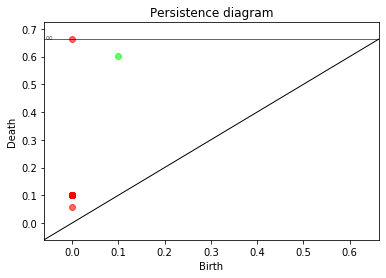

In [10]:
gudhi.plot_persistence_diagram(diags[2]) 

# Create Small-world Network

In [37]:
n=100
k = 2
p=.03
G = nx.watts_strogatz_graph(n, k, p, seed=None)

pos=nx.circular_layout(G)

colors = np.arange(n)
cmap = 'jet'

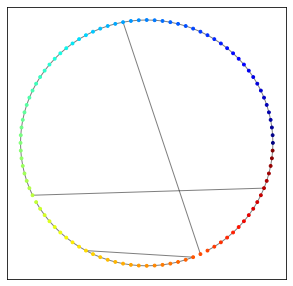

In [38]:
f1 = plt.figure(figsize=(5,5))
nx.draw_networkx_nodes(G,pos=pos,node_size=8,node_color=colors,cmap=cmap)
nx.draw_networkx_edges(G,pos=pos,edge_size=1,alpha=.5)

# Simulate a cascade

In [63]:
def get_access_times_for_node(G,start_node,T):
    
    x0 = np.zeros(G.size())
    x0[start_node] = 1;
    A = nx.adjacency_matrix(G).todense()


    # run a dynamics
    x = np.zeros((T,G.size()))
    x[0] = x0
    
    for t in range(T-1):
        x[t+1] = np.dot(A,x[t].T)
    
    access_times_for_cascade = np.array([np.where(x.T[i])[0][0] for i in range(G.size())])
    


    return access_times_for_cascade

In [88]:
start_node = 25
access_times = get_access_times_for_node(G,start_node,50)
access_times

IndexError: index 0 is out of bounds for axis 0 with size 0

ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 100, 'y' with size 100.

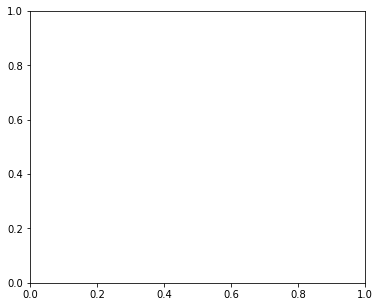

In [89]:
f1 = plt.figure(figsize=(6,5))
node_plot = nx.draw_networkx_nodes(G,pos=pos,node_size=20,node_color=access_times,cmap=cmap)
nx.draw_networkx_edges(G,pos=pos,edge_size=1,alpha=.5)

# show cascade starting point


nx.draw_networkx_nodes(G,nodelist=[start_node],pos=pos,node_size=50,node_color='black',alpha=.5)
plt.colorbar(node_plot)

In [158]:
# run a cascade started at each individual node and get access times for each cascade

access_times = np.zeros((n,n))
for start_node in range(n):
    access_times[start_node] = get_access_times_for_node(G,start_node,10)

# access_times[i,j] denotes how long a cascades started at i takes to get to j

IndexError: index 0 is out of bounds for axis 0 with size 0

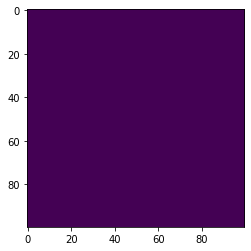

In [159]:
plt.imshow(access_times)

MAX = np.max(access_times)

In [42]:
import gudhi

In [43]:
point_cloud = access_times/n #gudhi.read_points_from_off_file(off_file = off_file)
rips_complex = gudhi.RipsComplex(points=point_cloud, 
                                 max_edge_length=10)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

In [44]:
# result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
#     repr(simplex_tree.num_simplices()) + ' simplices - ' + \
#     repr(simplex_tree.num_vertices()) + ' vertices.'
# print(result_str)
# fmt = '%s -> %.2f'
# for filtered_value in simplex_tree.get_filtration():
#     print(fmt % tuple(filtered_value))

Deprecated parameter. It has been replaced by max_intervals


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

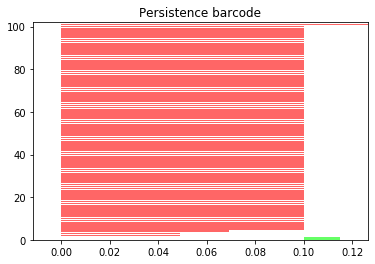

In [45]:
diag = simplex_tree.persistence(min_persistence=0.0)
gudhi.plot_persistence_barcode(diag)


Deprecated parameter. It has been replaced by max_intervals


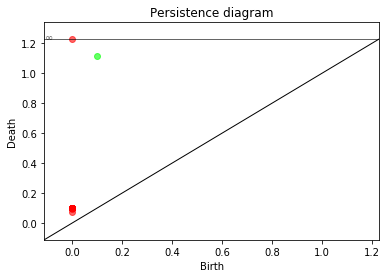

In [53]:
gudhi.plot_persistence_diagram(diag);

Deprecated parameter. It has been replaced by max_intervals


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

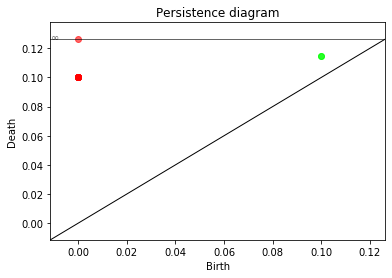

In [47]:
feature_dim = np.array([diag[i][0] for i in range(len(diag))])
gudhi.plot_persistence_diagram(diag[0:14])

In [17]:
# 1. for different p = [0,.1,.2,.3,.4,.5], create a persistence diagram and plot these side by side as subplots.
# 2. plot the corresponding networks in side-by-side subplots too.



